In [ ]:
!pip install --upgrade yellowbrick

     |████████████████████████████████| 276kB 13.2MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
#Task 1

In [5]:
#Importing packages

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, cross_val_score, RandomizedSearchCV, StratifiedKFold,RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from fancyimpute import KNN
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
from math import sqrt
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from statistics import mean, stdev
from sklearn.feature_selection import SelectKBest, chi2

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [6]:
# from google.colab import drive
# drive.mount("/content/drive/")
cardio_train = pd.read_csv("/content/drive/MyDrive/ML/Lab1/cardio-train.csv", sep=";")
cardio_valid = pd.read_csv("/content/drive/MyDrive/ML/Lab1/cardio-validation.csv")
cardio_test = pd.read_csv("/content/drive/MyDrive/ML/Lab1/cardio-test.csv")
cardio_valid_1 = cardio_valid.iloc[:251,:]
cardio_valid_2 = cardio_valid.iloc[251:,:]

In [ ]:
#1.Identify the dataset columns into nominal,categorical,continues etc.categories

"""
1. Age(days) - Continuous(Infinite number of real values)
2. Height(cm) - Interval (Consistent Units)
3. Weight(kg) - Interval (Consistent Units)
4. Gender - Nominal/Categorical 
5. Systolic blood pressure - Continuous
6. Diastolic blood pressure - Continuous
7. Cholesterol - Nominal/Categorical
8. Glucose - Nominal/Categorical
9. Smoking - Nominal/Categorical
10. Alcohol intake - Nominal/Categorical
11. Physical activity - Nominal/Categorical
12. Presence(1)or absence(0)of cardiovascular disease - Nominal/Categorical

"""

'\n1. Age(days) - Continuous(Infinite number of real values)\n2. Height(cm) - Interval (Consistent Units)\n3. Weight(kg) - Interval (Consistent Units)\n4. Gender - Nominal/Categorical \n5. Systolic blood pressure - Continuous\n6. Diastolic blood pressure - Continuous\n7. Cholesterol - Nominal/Categorical\n8. Glucose - Nominal/Categorical\n9. Smoking - Nominal/Categorical\n10. Alcohol intake - Nominal/Categorical\n11. Physical activity - Nominal/Categorical\n12. Presence(1)or absence(0)of cardiovascular disease - Nominal/Categorical\n\n'

In [ ]:
#2)Use dataframe.info and dataframe.describe to get the insights about the data.
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          335 non-null    float64
 2   gender       329 non-null    object 
 3   height       198 non-null    float64
 4   weight       336 non-null    float64
 5   ap_hi        347 non-null    float64
 6   ap_lo        332 non-null    float64
 7   cholesterol  333 non-null    object 
 8   gluc         333 non-null    object 
 9   smoke        326 non-null    float64
 10  alco         335 non-null    float64
 11  active       343 non-null    float64
 12  cardio       500 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 50.9+ KB


In [ ]:
cardio_train.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 3. Finding the number of non Null values
df_rows = len(cardio_train.index)
print("Number of NaN in each columns of the dataframe")
for index,value in cardio_train.count().items():
  val_nan = df_rows-value
  print(index+" "+str(val_nan))

Number of NaN in each columns of the dataframe
id 0
age 165
gender 171
height 302
weight 164
ap_hi 153
ap_lo 168
cholesterol 167
gluc 167
smoke 174
alco 165
active 157
cardio 0


In [ ]:
#4a) Finding the oldest patient
cardio_train[(cardio_train["age"]==cardio_train["age"].max())]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
485,75606,23479.0,NaN,NaN,NaN,120.0,80.0,Normal,NaN,0.0,NaN,1.0,1


In [ ]:
#4b) Finding the youngest patient
cardio_train[cardio_train["age"]==cardio_train["age"].min()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
147,44000,14334.0,NaN,163.0,NaN,130.0,NaN,Normal,NaN,0.0,0.0,NaN,0


In [ ]:
#4c) Finding the average age group
#Finding the mean
age_mean = round(cardio_train["age"].mean())
min_param = math.floor(age_mean/1000)*1000
max_param = min_param+1000

print(cardio_train[(cardio_train["age"]>=min_param) & (cardio_train["age"]<=max_param)])


"""Comments and Observations:
Taking the mean value and findng the average age(in days) group
"""



        id      age gender  height  ...  smoke  alco  active cardio
2    10483  19761.0    NaN   170.0  ...    0.0   0.0     1.0      1
3    22798  19035.0    Men     NaN  ...    0.0   NaN     NaN      0
7    75053  19233.0    NaN     NaN  ...    0.0   0.0     NaN      0
10   72532  19023.0    NaN     NaN  ...    0.0   0.0     NaN      1
29   45690  19601.0    Men     NaN  ...    0.0   0.0     NaN      0
53   48053  19791.0    Men     NaN  ...    0.0   0.0     1.0      1
67   13418  19648.0    NaN     NaN  ...    NaN   NaN     1.0      0
69   99662  19745.0    NaN     NaN  ...    NaN   NaN     1.0      0
85    8697  19641.0    NaN   164.0  ...    0.0   NaN     1.0      1
86   52175  19714.0    NaN   175.0  ...    NaN   0.0     1.0      1
92   81012  19842.0    Men     NaN  ...    NaN   NaN     NaN      1
102  13408  19678.0    Men   158.0  ...    0.0   NaN     1.0      0
117  53065  19051.0    Men     NaN  ...    0.0   0.0     NaN      0
143  41936  19169.0    NaN   168.0  ...    NaN  

'Comments and Observations:\nTaking the mean value and findng the average age(in days) group\n'

In [ ]:
# 4d) Find the median age
cardio_train["age"].median()

19719.0

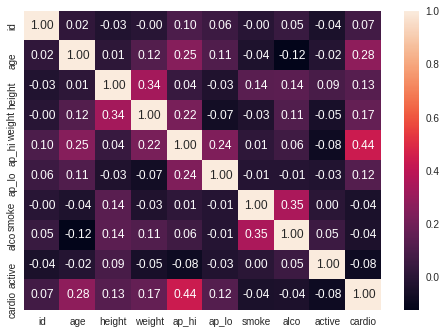

In [ ]:
# 4e) Find the relationship between the cardio and ages(the cardio column is your prediction variable)

# Heatmap has been constructed in order to find the relationship between other attributes and cardio
sns.heatmap(cardio_train.corr(), fmt='.2f', annot=True)


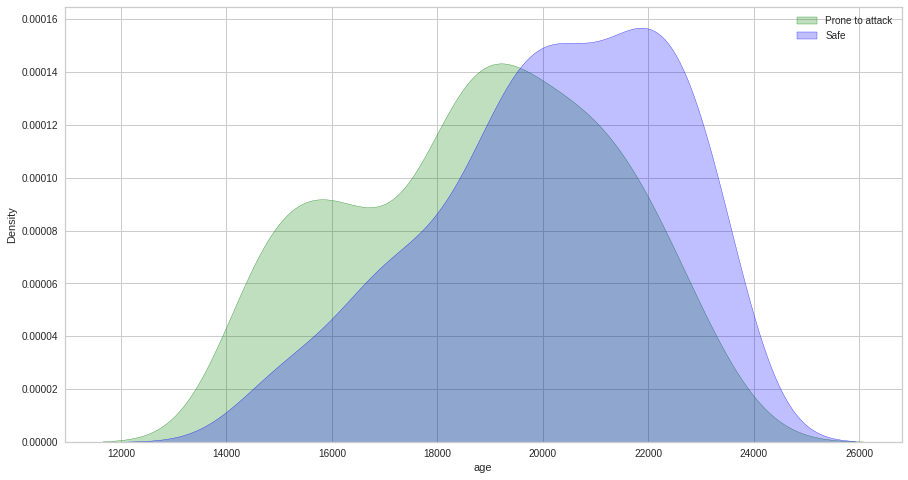

'\nComments and Observations:\n\n\n**Assuming \'0\' as "Prone to Cardiac Attack" patients\n\'1\' as "Safer zone" patients \n\nFrom the Correlation heatmap and the kdeplot, we could see that people "prone to cardiac attack" is higher around the age of 19000 days.\nIrrespective of the age, cardio attack may or may not be possible, which indicates other attributes along with age would influence the \npredictive variable. ie., cardiac\n\n'

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(
    cardio_train["age"][cardio_train["cardio"]==0 ],
    color="green",
    shade=True
)

sns.kdeplot(
    cardio_train["age"][cardio_train["cardio"]==1 ],
    color="blue",
    shade=True
)

plt.legend(["Prone to attack","Safe"])
plt.show()


"""
Comments and Observations:


**Assuming '0' as "Prone to Cardiac Attack" patients
'1' as "Safer zone" patients 

From the Correlation heatmap and the kdeplot, we could see that people "prone to cardiac attack" is higher around the age of 19000 days.
Irrespective of the age, cardio attack may or may not be possible, which indicates other attributes along with age would influence the 
predictive variable. ie., cardiac

"""

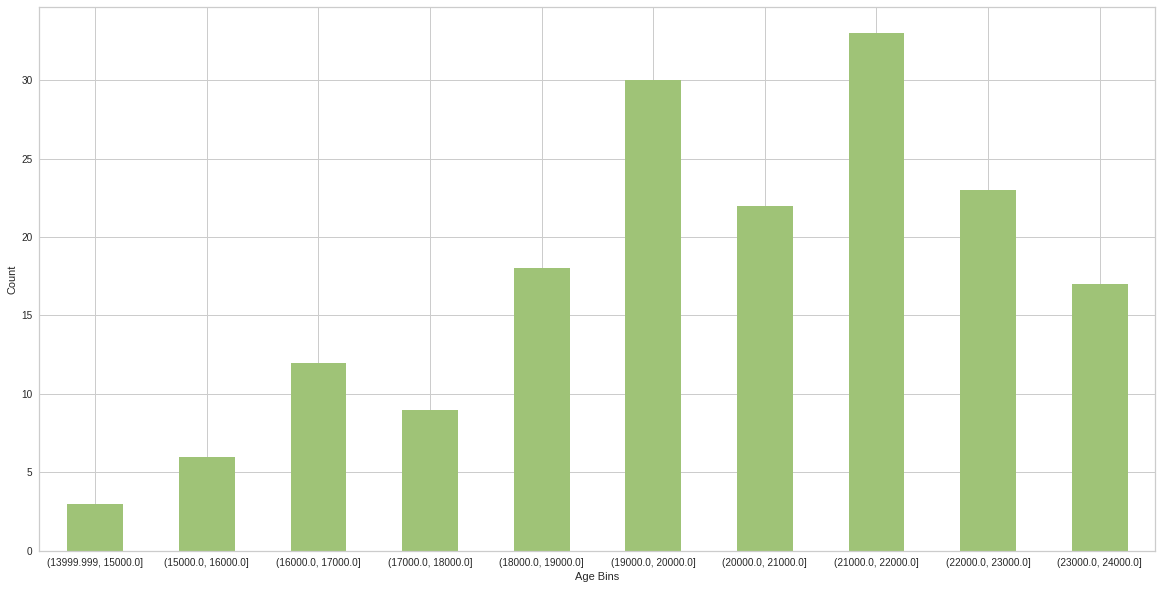

'\nComments and Observations:\n\nPerson with the age of 21000-22000 days has survived the most\n\n'

In [ ]:
#f) Find the age groups whose survival rate is the largest

#Filtering out the people survived
survival = cardio_train[cardio_train["cardio"]==1].reset_index()

min_age = round(cardio_train["age"].min()/1000)*1000
max_age = (round(cardio_train["age"].max()/1000)*1000)+1000

bins=[]
while min_age<=max_age:
  bins.append(min_age)
  min_age+= 1000

out=pd.cut(
    survival["age"],
    bins=bins,
    include_lowest=True
)

ax= out.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(20,10))
plt.xlabel("Age Bins")
plt.ylabel("Count")
plt.show()

"""
Comments and Observations:

Person with the age of 21000-22000 days has survived the most

"""

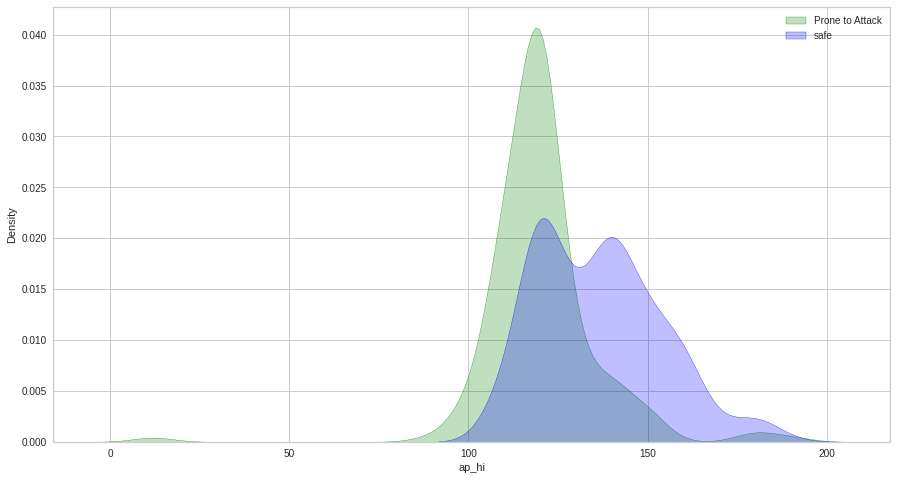

'\nComments and Observations:\n\nFrom the Correlation heatmap and the kdeplot, we could infer that ap_hi has a huge impact of a person getting cardio attack or not.\nFrom the plot, it is evident that ap_hi is definitely one of the best feature to predict cardio.\n\n'

In [ ]:
#Find similar relationships for at least 3-4 columns that you think can play a role in prediction (For example, systolic BP, cholesterol etc.)
#Column 1
# ap_hi
plt.figure(figsize=(15,8))
sns.kdeplot(
    cardio_train["ap_hi"][cardio_train["cardio"]==0 ],
    color="green",
    shade=True
)

sns.kdeplot(
    cardio_train["ap_hi"][cardio_train["cardio"]==1 ],
    color="blue",
    shade=True
)

plt.legend(["Prone to Attack","safe"])
plt.show()


"""
Comments and Observations:

From the Correlation heatmap and the kdeplot, we could infer that ap_hi has a huge impact of a person getting cardio attack or not.
From the plot, it is evident that ap_hi is definitely one of the best feature to predict cardio.

"""

In [ ]:
#Find similar relationships for at least 3-4 columns that you think can play a role in prediction (For example, systolic BP, cholesterol etc.)
#Appling label encoder for categorical values


plt.figure(figsize=(15,8))
cardio_temp = cardio_train.copy(deep=True)
cholesterol_mode = cardio_temp["cholesterol"].mode()
gluc_mode = cardio_temp["gluc"].mode()
gender_mode = cardio_temp["gender"].mode()

cardio_temp['cholesterol']= cardio_temp['cholesterol'].replace(np.nan, cholesterol_mode.iat[0])
cardio_temp['gluc']= cardio_temp['gluc'].replace(np.nan, gluc_mode.iat[0])
cardio_temp['gender']= cardio_temp['gender'].replace(np.nan, gender_mode.iat[0])

label_encoder_x = LabelEncoder()
cardio_temp["cholesterol"] = label_encoder_x.fit_transform(cardio_temp["cholesterol"])
cardio_temp["gluc"] = label_encoder_x.fit_transform(cardio_temp["gluc"])
cardio_temp["gender"] = label_encoder_x.fit_transform(cardio_temp["gender"])

"""
Comments and Observations:
Inorder to plot kdeplot, categorical values should be encoded. In order to encode, the NaN values are imputed.

"""

'\nComments and Observations:\nInorder to plot kdeplot, categorical values should be encoded. In order to encode, the NaN values are imputed.\n\n'

<Figure size 1080x576 with 0 Axes>

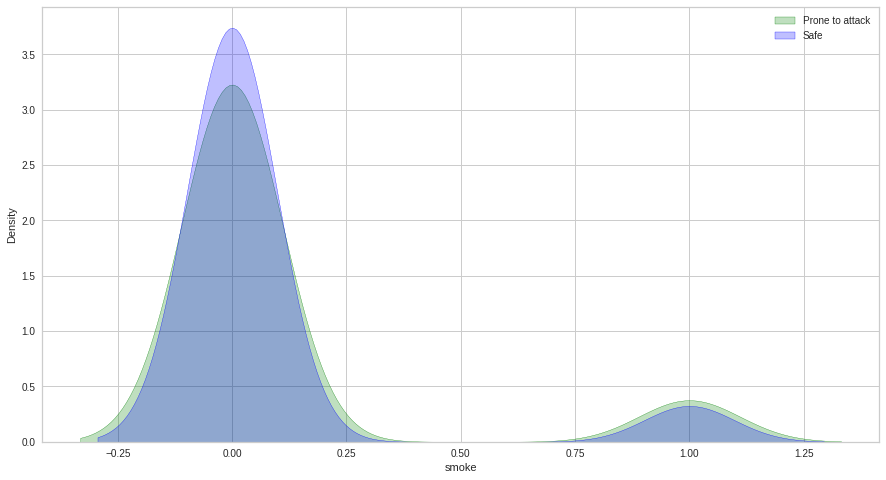

'\nComments and Observations:\n\nFrom the Correlation heatmap and the kdeplot, we could see that the relationship between smoke and cardio is uncertain.\n"Safe" and "Prone to Cardio" are common irrespective of smoking rates here.\nOne inference is that both "Prone to Cardio" and "Safe" is high when smoke=0 \n\n\n'

In [ ]:
#Column 2
#cholesterol
plt.figure(figsize=(15,8))
sns.kdeplot(
    cardio_train["smoke"][cardio_train["cardio"]==0 ],
    color="green",
    shade=True
)

sns.kdeplot(
    cardio_train["smoke"][cardio_train["cardio"]==1 ],
    color="blue",
    shade=True
)

plt.legend(["Prone to attack","Safe"])
plt.show()


"""
Comments and Observations:

From the Correlation heatmap and the kdeplot, we could see that the relationship between smoke and cardio is uncertain.
"Safe" and "Prone to Cardio" are common irrespective of smoking rates here.
One inference is that both "Prone to Cardio" and "Safe" is high when smoke=0 


"""

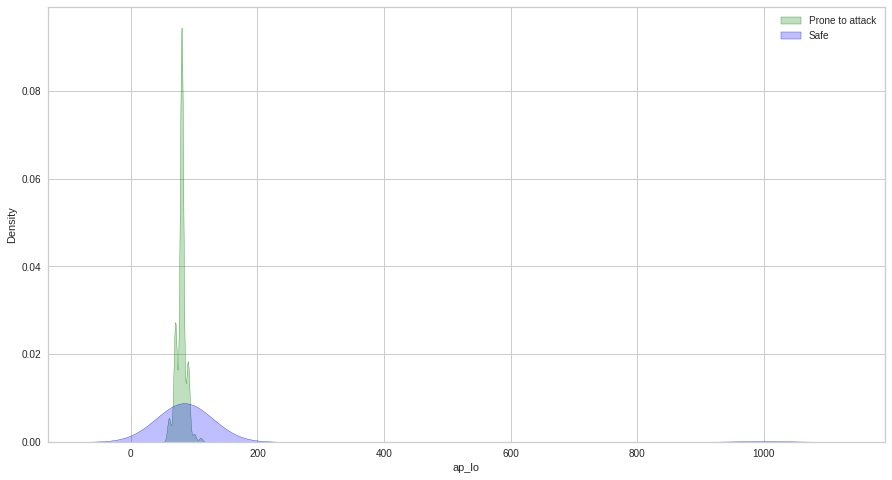

'\nComments and Observations:\n\n\nFrom the Correlation heatmap and the kdeplot, we could infer that both "Prone to attack" and "Safe" are distributed widely based on ap_lo.\n"ap_lo" should be one of the features to be considered inorder to predict "Cardio".\n\n\n'

In [ ]:
#Column 3
#Smoke
plt.figure(figsize=(15,8))
sns.kdeplot(
    cardio_train["ap_lo"][cardio_train["cardio"]==0 ],
    color="green",
    shade=True
)

sns.kdeplot(
    cardio_train["ap_lo"][cardio_train["cardio"]==1 ],
    color="blue",
    shade=True
)

plt.legend(["Prone to attack","Safe"])
plt.show()


"""
Comments and Observations:


From the Correlation heatmap and the kdeplot, we could infer that both "Prone to attack" and "Safe" are distributed widely based on ap_lo.
"ap_lo" should be one of the features to be considered inorder to predict "Cardio".


"""

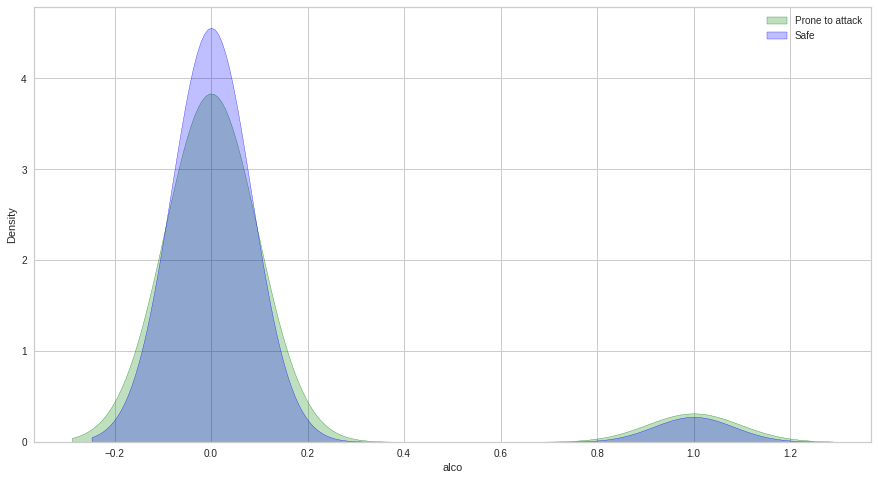

'\nComments and Observations:\n\nFrom the kdeplot, "Prone to attack" and "Safe" rates rise/fall irrespective of alcohol intake.\n'

In [ ]:
#Column 4
#Alcohol
plt.figure(figsize=(15,8))
sns.kdeplot(
    cardio_train["alco"][cardio_train["cardio"]==0 ],
    color="green",
    shade=True
)

sns.kdeplot(
    cardio_train["alco"][cardio_train["cardio"]==1 ],
    color="blue",
    shade=True
)

plt.legend(["Prone to attack","Safe"])
plt.show()


"""
Comments and Observations:

From the kdeplot, "Prone to attack" and "Safe" rates rise/fall irrespective of alcohol intake.
"""

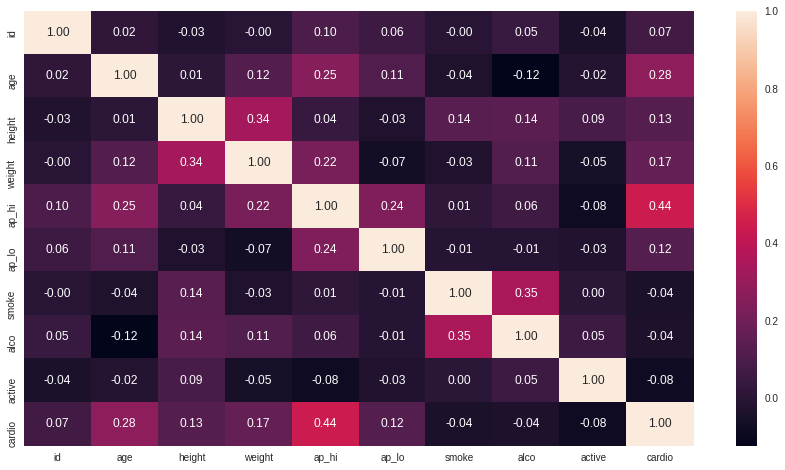

In [ ]:
#h. Get more visuals on data distributions
#Use plotCorrelationMatrix
plt.figure(figsize=(15,8))
sns.heatmap(cardio_train.corr(), fmt=".2f", annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6850ad4b10>,
      dtype=object)

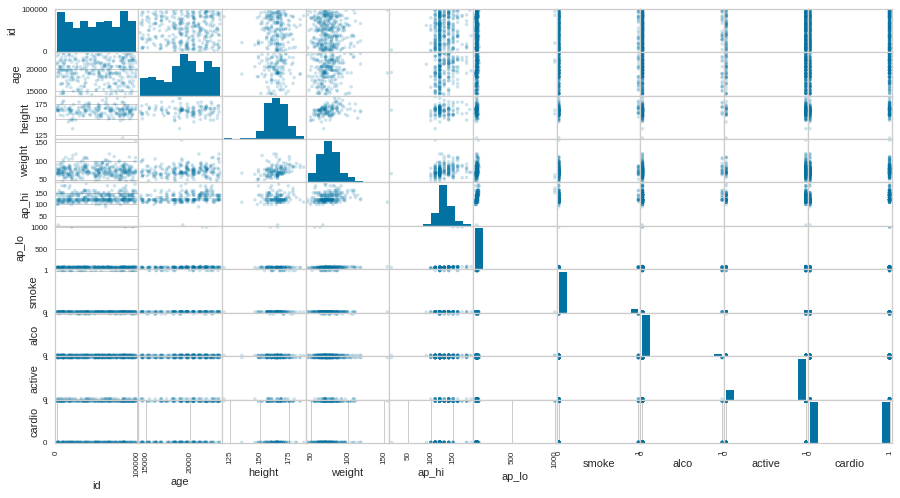

In [ ]:
#Plotting scattermatrix
pd.plotting.scatter_matrix(cardio_train, alpha=0.2,  figsize=(15, 8))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level f

'\n\nComments and Observations:\n\nFrom the distribution, the inference is that there could be outliers that the model should handle. \nap_hi, ap_lo, height, age, weight seems to be the best features to predict the "cardio" target from the distribution plots and correlation matrix.\n\n'

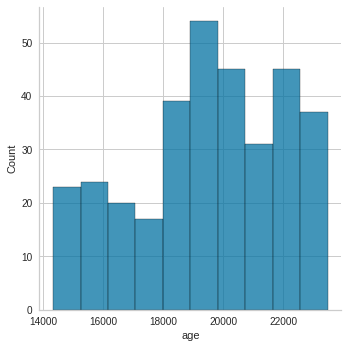

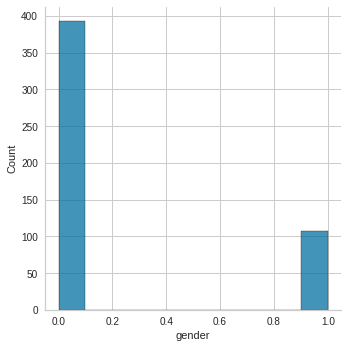

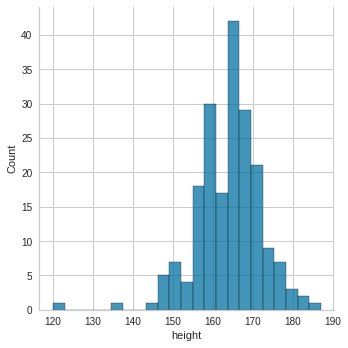

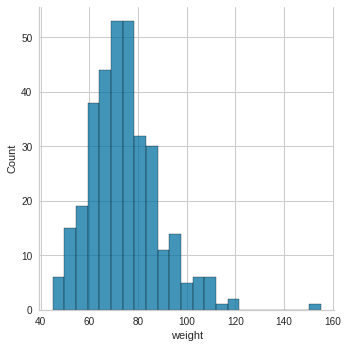

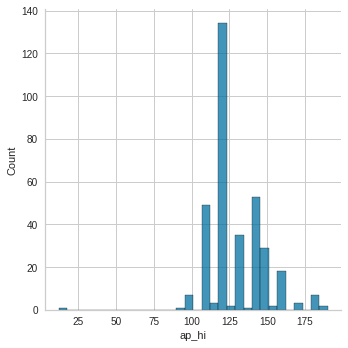

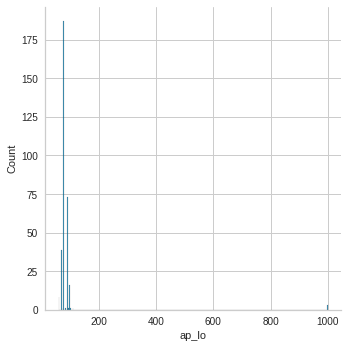

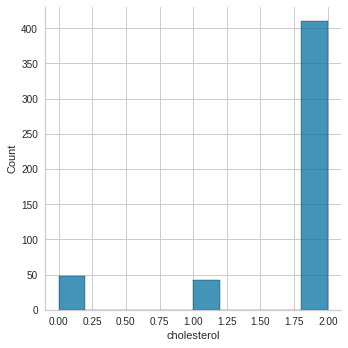

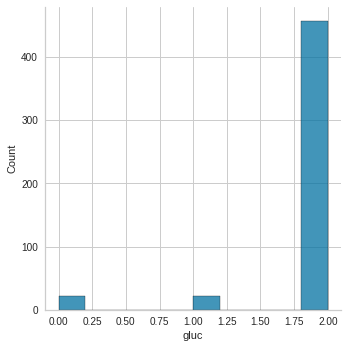

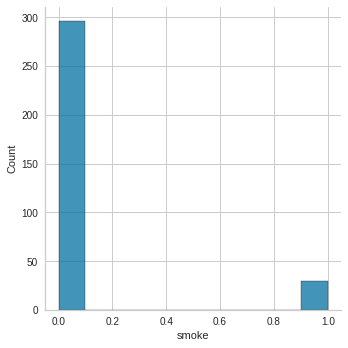

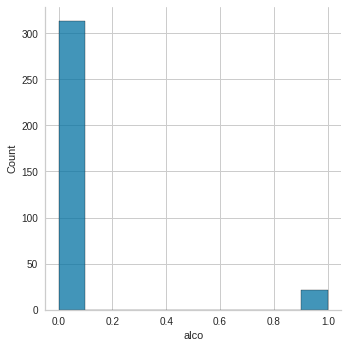

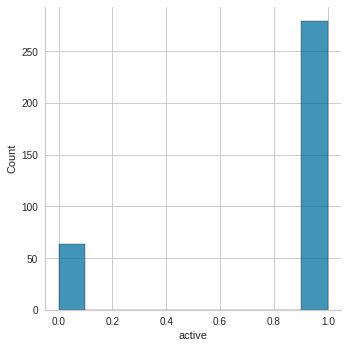

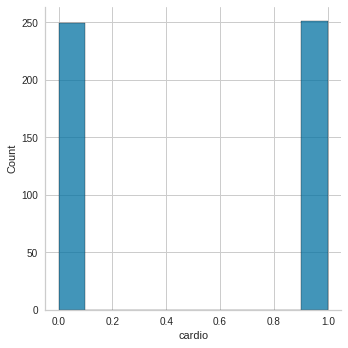

In [ ]:
#Plot per column distribution

cols = cardio_temp.columns.to_list()
cols.remove("id")

row = 0
col = 0

for i in cols:
    sns.displot(ax=axes[row], data= cardio_temp, x=i)
    axes[row].set_title = i
    row = row+1



"""

Comments and Observations:

From the distribution, the inference is that there could be outliers that the model should handle. 
ap_hi, ap_lo, height, age, weight seems to be the best features to predict the "cardio" target from the distribution plots and correlation matrix.

"""



In [ ]:
"""
Comments and Observations:

From the visualizations created above, we could infer that age, ap_hi and ap_lo are best features to be considered for "Cardio" prediction.

"""

'\nComments and Observations:\n\nFrom the visualizations created above, we could infer that age, ap_hi and ap_lo are best features to be considered for "Cardio" prediction.\n\n'

In [ ]:
# Find Missing Values
# ii) Get the count of missing values

# Column-wise NaN count 
print("Total Nan per Columns")
print(cardio_train.isna().sum())

print("\nCount total NaN in a DataFrame : \n\n", cardio_train.isnull().sum().sum()) 


Total Nan per Columns
id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

Count total NaN in a DataFrame : 

 1953


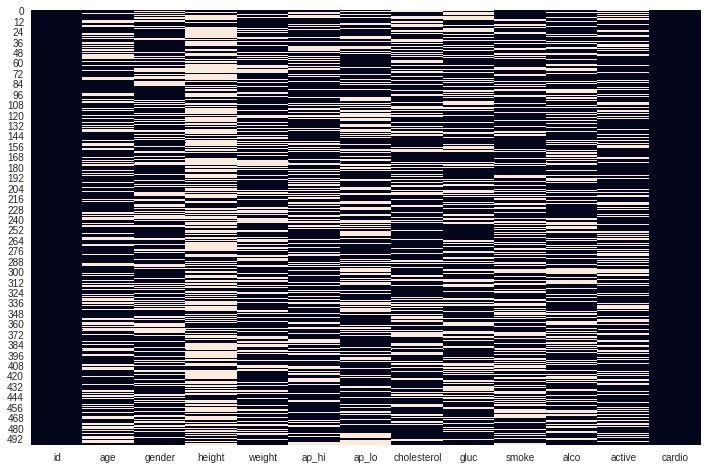

In [ ]:
#i ii)Plot heatmap for missing values
plt.figure(figsize=(12,8))
sns.heatmap(cardio_train.isnull(), cbar=False)

In [ ]:
#Applying a different technique to handle missing values (For each technique verify your prediction results)
#i) Use dropna

cardio_train.dropna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
90,25306,17500.0,Women,160.0,62.0,120.0,80.0,Normal,Normal,0.0,0.0,1.0,0
146,91154,19802.0,Men,162.0,72.0,120.0,80.0,Normal,Normal,0.0,0.0,1.0,1
166,69120,14553.0,Men,157.0,60.0,110.0,75.0,Normal,Above Normal,0.0,0.0,0.0,1
187,68932,20482.0,Women,169.0,64.0,120.0,80.0,Normal,Normal,0.0,0.0,1.0,0
200,48446,22359.0,Women,168.0,86.0,160.0,90.0,Above Normal,Normal,1.0,0.0,1.0,1
351,99244,21373.0,Men,171.0,75.0,150.0,90.0,Normal,Normal,0.0,0.0,0.0,1
453,84726,21933.0,Men,172.0,93.0,120.0,80.0,Normal,Normal,0.0,0.0,1.0,0


In [ ]:
#ii) Use replace NA with zero

cardio_train.fillna(0)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,0,163.0,75.0,120.0,0.0,0,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,0,0,0.0,0.0,0.0,0
2,10483,19761.0,0,170.0,75.0,120.0,0.0,0,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,0.0,89.0,0.0,80.0,Normal,0,0.0,0.0,0.0,0
4,85542,0.0,0,158.0,74.0,0.0,93.0,High,0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74393,0.0,Women,174.0,73.0,130.0,0.0,0,Normal,0.0,0.0,1.0,1
496,38938,0.0,Men,0.0,89.0,130.0,0.0,High,Normal,0.0,0.0,0.0,1
497,9037,0.0,Women,180.0,84.0,0.0,0.0,Normal,Above Normal,1.0,0.0,1.0,0
498,27539,0.0,Women,0.0,0.0,110.0,70.0,0,0,0.0,0.0,1.0,0


In [ ]:
#j) ii) Use replace NA with Max Value
# Original Data
print(cardio_train.fillna(cardio_train.max()))

# Imputed Data
print(cardio_temp.fillna(cardio_temp.max()))

# Comments:
# Filling NaN with Max values is applicable only for numerical data, not for categorical data.


        id      age gender  height  ...  smoke  alco  active cardio
0    92150  20535.0    NaN   163.0  ...    0.0   0.0     1.0      0
1    88880  16125.0    Men   168.0  ...    0.0   0.0     1.0      0
2    10483  19761.0    NaN   170.0  ...    0.0   0.0     1.0      1
3    22798  19035.0    Men   187.0  ...    0.0   1.0     1.0      0
4    85542  23479.0    NaN   158.0  ...    0.0   1.0     1.0      1
..     ...      ...    ...     ...  ...    ...   ...     ...    ...
495  74393  23479.0  Women   174.0  ...    0.0   0.0     1.0      1
496  38938  23479.0    Men   187.0  ...    0.0   0.0     1.0      1
497   9037  23479.0  Women   180.0  ...    1.0   0.0     1.0      0
498  27539  23479.0  Women   187.0  ...    1.0   0.0     1.0      0
499  13409  16698.0    Men   187.0  ...    1.0   0.0     1.0      0

[500 rows x 13 columns]
        id      age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0    92150  20535.0       0   163.0    75.0  ...     2    0.0   0.0     1.0

In [ ]:
#j) iii) Use replace NA with mean
#Original Data
print(cardio_train.fillna(cardio_train.mean()))

#Imputed Data
print(cardio_temp.fillna(cardio_temp.mean()))
#Comments:
#Filling NaN with mean values is applicable only for numerical data, not for categorical data.


        id           age gender  ...      alco    active  cardio
0    92150  20535.000000    NaN  ...  0.000000  1.000000       0
1    88880  16125.000000    Men  ...  0.000000  0.813411       0
2    10483  19761.000000    NaN  ...  0.000000  1.000000       1
3    22798  19035.000000    Men  ...  0.065672  0.813411       0
4    85542  19490.886567    NaN  ...  1.000000  1.000000       1
..     ...           ...    ...  ...       ...       ...     ...
495  74393  19490.886567  Women  ...  0.000000  1.000000       1
496  38938  19490.886567    Men  ...  0.000000  0.813411       1
497   9037  19490.886567  Women  ...  0.000000  1.000000       0
498  27539  19490.886567  Women  ...  0.000000  1.000000       0
499  13409  16698.000000    Men  ...  0.000000  1.000000       0

[500 rows x 13 columns]
        id           age  gender  ...      alco    active  cardio
0    92150  20535.000000       0  ...  0.000000  1.000000       0
1    88880  16125.000000       0  ...  0.000000  0.813411      

In [ ]:
#j) iv. Search for additional techniques to handle null values, excluding the above three and test. (Include all the techniques that you used in your report.)

#Replacement Strategy 1
#Using median

cardio_temp = cardio_train.copy(deep=True)
cholesterol_mode = cardio_temp["cholesterol"].mode()
gluc_mode = cardio_temp["gluc"].mode()
gender_mode = cardio_temp["gender"].mode()

cardio_temp['cholesterol']= cardio_temp['cholesterol'].replace(np.nan, cholesterol_mode.iat[0])
cardio_temp['gluc']= cardio_temp['gluc'].replace(np.nan, gluc_mode.iat[0])
cardio_temp['gender']= cardio_temp['gender'].replace(np.nan, gender_mode.iat[0])

label_encoder_x = LabelEncoder()
cardio_temp["cholesterol"] = label_encoder_x.fit_transform(cardio_temp["cholesterol"])
cardio_temp["gluc"] = label_encoder_x.fit_transform(cardio_temp["gluc"])
cardio_temp["gender"] = label_encoder_x.fit_transform(cardio_temp["gender"])

cardio_temp.fillna(cardio_temp.median())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,0,163.0,75.0,120.0,80.0,2,2,0.0,0.0,1.0,0
1,88880,16125.0,0,168.0,68.0,110.0,70.0,2,2,0.0,0.0,1.0,0
2,10483,19761.0,0,170.0,75.0,120.0,80.0,2,2,0.0,0.0,1.0,1
3,22798,19035.0,0,165.0,89.0,120.0,80.0,2,2,0.0,0.0,1.0,0
4,85542,19719.0,0,158.0,74.0,120.0,93.0,1,2,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74393,19719.0,1,174.0,73.0,130.0,80.0,2,2,0.0,0.0,1.0,1
496,38938,19719.0,0,165.0,89.0,130.0,80.0,1,2,0.0,0.0,1.0,1
497,9037,19719.0,1,180.0,84.0,120.0,80.0,2,0,1.0,0.0,1.0,0
498,27539,19719.0,1,165.0,72.0,110.0,70.0,2,2,0.0,0.0,1.0,0


In [ ]:
#Replacement Strategy 2
#Using mode
cardio_temp1 = cardio_temp.copy(deep=True)
for column in cardio_temp1.columns:
    cardio_temp1[column].fillna(cardio_temp1[column].mode()[0], inplace=True)
cardio_temp1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,0,163.0,75.0,120.0,80.0,2,2,0.0,0.0,1.0,0
1,88880,16125.0,0,168.0,68.0,110.0,70.0,2,2,0.0,0.0,1.0,0
2,10483,19761.0,0,170.0,75.0,120.0,80.0,2,2,0.0,0.0,1.0,1
3,22798,19035.0,0,165.0,89.0,120.0,80.0,2,2,0.0,0.0,1.0,0
4,85542,17582.0,0,158.0,74.0,120.0,93.0,1,2,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74393,17582.0,1,174.0,73.0,130.0,80.0,2,2,0.0,0.0,1.0,1
496,38938,17582.0,0,165.0,89.0,130.0,80.0,1,2,0.0,0.0,1.0,1
497,9037,17582.0,1,180.0,84.0,120.0,80.0,2,0,1.0,0.0,1.0,0
498,27539,17582.0,1,165.0,78.0,110.0,70.0,2,2,0.0,0.0,1.0,0


In [ ]:
#Replacement Strategy 3
#Using KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(cardio_temp)
pd.DataFrame(df_filled, index=cardio_temp.index, columns=cardio_temp.columns)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150.0,20535.0,0.0,163.0,75.0,120.0,80.0,2.0,2.0,0.0,0.0,1.0,0.0
1,88880.0,16125.0,0.0,168.0,68.0,110.0,70.0,2.0,2.0,0.0,0.0,1.0,0.0
2,10483.0,19761.0,0.0,170.0,75.0,120.0,85.0,2.0,2.0,0.0,0.0,1.0,1.0
3,22798.0,19035.0,0.0,155.0,89.0,115.0,80.0,2.0,2.0,0.0,0.0,0.5,0.0
4,85542.0,20847.0,0.0,158.0,74.0,130.0,93.0,1.0,2.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74393.0,16771.5,1.0,174.0,73.0,130.0,80.0,2.0,2.0,0.0,0.0,1.0,1.0
496,38938.0,16685.5,0.0,175.5,89.0,130.0,80.0,1.0,2.0,0.0,0.0,0.5,1.0
497,9037.0,16407.5,1.0,180.0,84.0,115.0,85.0,2.0,0.0,1.0,0.0,1.0,0.0
498,27539.0,18426.5,1.0,167.0,62.5,110.0,70.0,2.0,2.0,0.5,0.0,1.0,0.0


In [7]:
#k. Applying the feature scaling technique if you think it is required. (Optional)

cardio_train_copy = cardio_train.copy(deep=True)
#cardio_train_copy = cardio_train_copy.append(cardio_valid)
cholesterol_mode = cardio_train_copy["cholesterol"].mode()
gluc_mode = cardio_train_copy["gluc"].mode()
gender_mode = cardio_train_copy["gender"].mode()

cardio_train_copy['cholesterol']= cardio_train_copy['cholesterol'].replace(np.nan, cholesterol_mode.iat[0])
cardio_train_copy['gluc']= cardio_train_copy['gluc'].replace(np.nan, gluc_mode.iat[0])
cardio_train_copy['gender']= cardio_train_copy['gender'].replace(np.nan, gender_mode.iat[0])

label_encoder_x = LabelEncoder()
cardio_train_copy["cholesterol"] = label_encoder_x.fit_transform(cardio_train_copy["cholesterol"])
cardio_train_copy["gluc"] = label_encoder_x.fit_transform(cardio_train_copy["gluc"])
cardio_train_copy["gender"] = label_encoder_x.fit_transform(cardio_train_copy["gender"])


for i in cardio_train_copy.columns:
  if i not in ["id","cardio"]:
    cardio_train_copy[i].fillna(round(cardio_train_copy[i].mean()), inplace=True)
cardio_train_copy

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,0,163.0,75.0,120.0,90.0,2,2,0.0,0.0,1.0,0
1,88880,16125.0,0,168.0,68.0,110.0,70.0,2,2,0.0,0.0,1.0,0
2,10483,19761.0,0,170.0,75.0,120.0,90.0,2,2,0.0,0.0,1.0,1
3,22798,19035.0,0,164.0,89.0,129.0,80.0,2,2,0.0,0.0,1.0,0
4,85542,19491.0,0,158.0,74.0,129.0,93.0,1,2,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74393,19491.0,1,174.0,73.0,130.0,90.0,2,2,0.0,0.0,1.0,1
496,38938,19491.0,0,164.0,89.0,130.0,90.0,1,2,0.0,0.0,1.0,1
497,9037,19491.0,1,180.0,84.0,129.0,90.0,2,0,1.0,0.0,1.0,0
498,27539,19491.0,1,164.0,74.0,110.0,70.0,2,2,0.0,0.0,1.0,0


In [8]:
cardio_valid_copy = cardio_valid.copy(deep=True)
#cardio_train_copy = cardio_train_copy.append(cardio_valid)
cholesterol_mode = cardio_valid_copy["cholesterol"].mode()
gluc_mode = cardio_valid_copy["gluc"].mode()
gender_mode = cardio_valid_copy["gender"].mode()

cardio_valid_copy['cholesterol']= cardio_valid_copy['cholesterol'].replace(np.nan, cholesterol_mode.iat[0])
cardio_valid_copy['gluc']= cardio_valid_copy['gluc'].replace(np.nan, gluc_mode.iat[0])
cardio_valid_copy['gender']= cardio_valid_copy['gender'].replace(np.nan, gender_mode.iat[0])

label_encoder_x = LabelEncoder()
cardio_valid_copy["cholesterol"] = label_encoder_x.fit_transform(cardio_valid_copy["cholesterol"])
cardio_valid_copy["gluc"] = label_encoder_x.fit_transform(cardio_valid_copy["gluc"])
cardio_valid_copy["gender"] = label_encoder_x.fit_transform(cardio_valid_copy["gender"])


for i in cardio_valid_copy.columns:
  if i not in ["id","cardio"]:
    cardio_valid_copy[i].fillna(round(cardio_valid_copy[i].mean()), inplace=True)

cardio_valid_copy

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,17934,18936.0,0,165.0,60.0,126.0,80.0,2,2,0.0,0.0,1.0,1
1,52450,17987.0,0,165.0,58.8,120.0,90.0,2,2,0.0,0.0,1.0,0
2,37653,19360.0,0,159.0,93.0,130.0,90.0,1,2,0.0,0.0,1.0,1
3,96970,22851.0,1,172.0,74.0,126.0,100.0,2,2,0.0,0.0,1.0,1
4,50977,19360.0,1,165.0,116.0,126.0,80.0,1,2,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,68639,19360.0,0,164.0,72.0,140.0,80.0,2,2,0.0,0.0,1.0,1
496,35524,15851.0,0,159.0,74.0,90.0,60.0,2,2,0.0,0.0,1.0,0
497,43938,21010.0,0,168.0,74.0,126.0,90.0,2,2,0.0,0.0,1.0,1
498,1487,19360.0,1,170.0,87.0,120.0,99.0,2,2,0.0,0.0,1.0,0


In [9]:
X = cardio_train_copy.drop(["id","cardio"], axis=1)
#X =cardio_train_copy[["age","ap_hi","ap_lo"]]
y = cardio_train_copy[["cardio"]]
X_valid = cardio_valid_copy.drop(["id","cardio"], axis=1)
#X_valid =cardio_valid_copy[["age","ap_hi","ap_lo"]]
y_valid = cardio_valid_copy[["cardio"]]

#k.Applying the feature scaling technique if you think it is required. (Optional)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled_valid = scaler.fit_transform(X_valid)
"""
Comments and Observations:
Scaling doesn't decrease the rmse for me.
"""

"\nComments and Observations:\nScaling doesn't decrease the rmse for me.\n"

In [10]:
#Filling out missed value
cardio_test_copy = cardio_test.copy(deep=True)
#cardio_test_copy = cardio_test_copy.append(cardio_valid_2)
cholesterol_mode = cardio_test_copy["cholesterol"].mode()
gluc_mode = cardio_test_copy["gluc"].mode()
gender_mode = cardio_test_copy["gender"].mode()

cardio_test_copy['cholesterol']= cardio_test_copy['cholesterol'].replace(np.nan, cholesterol_mode.iat[0])
cardio_test_copy['gluc']= cardio_test_copy['gluc'].replace(np.nan, gluc_mode.iat[0])
cardio_test_copy['gender']= cardio_test_copy['gender'].replace(np.nan, gender_mode.iat[0])

label_encoder_x = LabelEncoder()
cardio_test_copy["cholesterol"] = label_encoder_x.fit_transform(cardio_test_copy["cholesterol"])
cardio_test_copy["gluc"] = label_encoder_x.fit_transform(cardio_test_copy["gluc"])
cardio_test_copy["gender"] = label_encoder_x.fit_transform(cardio_test_copy["gender"])
cardio_test_copy["age"] = cardio_test_copy["age"]/365
for i in cardio_test_copy.columns:
  if i not in ["id","cardio"]:
    cardio_test_copy[i].fillna(round(cardio_test_copy[i].mean()), inplace=True)
X_test = cardio_test_copy.drop(["id"], axis=1)

cardio_test_copy


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,47997,55.402740,0,156,57.0,110,70,2,2,0,1,0
1,15311,49.531507,0,160,60.0,120,80,2,2,0,0,1
2,44269,55.558904,1,170,80.0,140,69,2,2,0,0,1
3,91373,63.635616,0,158,80.0,160,90,1,2,0,0,1
4,9686,56.057534,0,158,92.0,140,90,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
245,46137,54.167123,0,162,64.0,110,70,2,2,0,0,1
246,58058,53.421918,0,162,80.0,150,90,1,2,0,0,1
247,30608,51.369863,0,170,62.0,120,60,2,2,0,0,1
248,83845,53.989041,0,162,95.0,130,80,2,2,0,0,1


array([  6.42617434,   6.44565905,   6.97060926,   9.05373241,
        12.04537625,  22.56745637,  27.7766665 ,  43.6138964 ,
        76.39043778,  78.72887814, 100.        ])

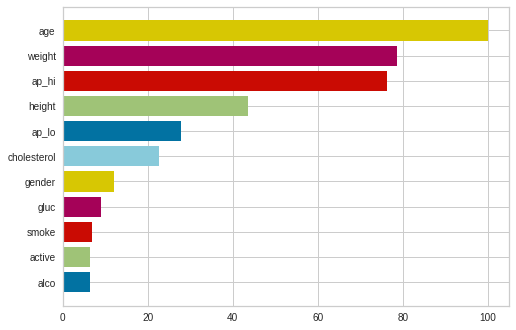

In [ ]:
# Delete
feature_model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(feature_model)
viz.fit(X, y)
viz.feature_importances_

In [69]:
#l. Applying the regression models that you think is most suited for this problem
#Method 1
pipe = Pipeline([('classifier' , RandomForestClassifier())])

param_grid = [
    {'classifier' : [DecisionTreeClassifier()],
  },
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))
    }
]

mod = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

mod.fit(X, y)
pred = mod.predict(X_valid)
print("RMSE", mean_squared_error(pred, y_valid))

Fitting 5 folds for each of 61 candidates, totalling 305 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 305 out of 305 | elapsed:   16.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


RMSE 0.32


In [72]:
mod.best_params_
print("Accuracy Score",accuracy_score(y_valid,pred))

Accuracy Score 0.68


In [73]:
#Model 2
model = SVC(random_state= 5)
model.fit(X, y)
pred = model.predict(X_valid)
print("RMSE", mean_squared_error(pred, y_valid))
print("Accuracy Score",accuracy_score(y_valid,pred))

RMSE 0.43
Accuracy Score 0.57


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
# Model 3
mod =GradientBoostingClassifier(learning_rate=0.01)
mod.fit(X, y)
pred = mod.predict(X_valid)
print("RMSE", mean_squared_error(pred, y_valid))
print("Accuracy Score",accuracy_score(y_valid,pred))

RMSE 0.27
Accuracy Score 0.73


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
# Model 4
xgb1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
#model = modelfit(xgb1, cardio_train_copy, predictors)
eval_set = [(X_valid, y_valid)]
xgb1.fit(X,y, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
pred = xgb1.predict(X_valid)
print("RMSE:", mean_squared_error(y_valid, pred))
print("Accuracy Score",accuracy_score(y_valid,pred))

[0]	validation_0-logloss:0.673417
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.656952
[2]	validation_0-logloss:0.644214
[3]	validation_0-logloss:0.632535
[4]	validation_0-logloss:0.621641
[5]	validation_0-logloss:0.612008
[6]	validation_0-logloss:0.607196
[7]	validation_0-logloss:0.600615
[8]	validation_0-logloss:0.593547
[9]	validation_0-logloss:0.586123
[10]	validation_0-logloss:0.581533
[11]	validation_0-logloss:0.577136
[12]	validation_0-logloss:0.575569
[13]	validation_0-logloss:0.57316
[14]	validation_0-logloss:0.570081
[15]	validation_0-logloss:0.569523
[16]	validation_0-logloss:0.568424
[17]	validation_0-logloss:0.565542
[18]	validation_0-logloss:0.564056
[19]	validation_0-logloss:0.563945
[20]	validation_0-logloss:0.564891
[21]	validation_0-logloss:0.563412
[22]	validation_0-logloss:0.562492
[23]	validation_0-logloss:0.56259
[24]	validation_0-logloss:0.562738
[25]	validation_0-logloss:0.563371
[26]	validation_0-logloss:0.563508

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
#Model 5
rdg = RidgeClassifier(alpha = 0.1)
rdg.fit(X, y)
pred = rdg.predict(X_valid)
print("RMSE:", mean_squared_error(y_valid, pred))
print("Accuracy Score",accuracy_score(y_valid,pred))

RMSE: 0.286
Accuracy Score 0.714


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Model 6
params = {
    "max_depth": [i for i in range(2,6)],
    "learning_rate":[0.01,0.001,0.0001,0.2,0.05,0.1],
    "min_child_weight":[1,2,3,5,10],
    "n_estimators":[50,100,200,300,500, 1000]
    
}
xgbtry = RandomizedSearchCV(xgb.XGBRegressor(),param_grid)
xgbtry.fit(X,y)
y_pred = xgbtry.predict(X_valid)
print("MSE", mean_squared_error(y_valid, y_pred, squared=False))
print(xgbtry.best_params_)


[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [79]:
xgb_final1 = xgb.XGBRegressor(subsample=  0.8, n_estimators= 200, min_child_weight= 5, max_depth= 5, learning_rate= 0.01, gamma= 1, colsample_by_tree= 0.6)
xgb_final1.fit(X,y)
print("Accuracy Score", accuracy_score(pd.Series([round(i) for i in xgb_final1.predict(X_valid).tolist()]),y_valid))
print("rmse", mean_squared_error(xgb_final1.predict(X_valid),y_valid))

[06:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy Score 0.73
rmse 0.18869203392541273


In [62]:
# Submitted model in Kaggle
xgb_final = xgb.XGBRegressor(subsample=  0.8, n_estimators= 200, min_child_weight= 5, max_depth= 5, learning_rate= 0.01, gamma= 1, colsample_by_tree= 0.6)
xgb_final.fit(X,y)
y_pred = xgb_final.predict(X_test)
valid_df = cardio_test_copy[["id"]]
valid_df["cardio"] = pd.Series(y_pred)
valid_df["id"] = valid_df["id"].astype("int")
valid_df["cardio"] = valid_df["cardio"]
valid_df.to_csv("xgb.csv")
valid_df

[05:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,id,cardio
0,47997,0.151767
1,15311,0.168706
2,44269,0.732722
3,91373,0.722398
4,9686,0.677392
...,...,...
245,46137,0.142340
246,58058,0.714665
247,30608,0.194462
248,83845,0.464409


In [ ]:
#m. At least one of the models used to compute should be your own implementation using NumPy.
class MyRegression_logistic() :
	def __init__( self, lr, n ) :		
		self.lr = lr		
		self.n = n
		
	def find( self, X ) :	
		predd = 1 / ( 1 + np.exp( - ( X.dot( self.weight ) + self.intercept ) ) )		
		return np.where( predd > 0.5, 1, 0 )	
  
	def train( self, X, Y ) :			
		self.slope, self.sn = X.shape		
		self.weight = np.zeros( self.sn )		
		self.intercept = 0		
		self.X = X		
		self.Y = Y
		for i in range( self.n ) :			
			self.weight_updation()			
		return self
	
	
	def weight_updation( self ) :		
		val = 1 / ( 1 + np.exp( - ( self.X.dot( self.weight) + self.intercept) ) )
		pmt = ( val - self.Y.T )		
		pmt = np.reshape( pmt, self.slope )		
		dffwe = np.dot( self.X.T, pmt ) / self.slope	
		dffint = np.sum( pmt ) / self.slope
	
		self.weight= self.weight - self.lr * dffwe
		self.intercept = self.intercept - self.lr * dffint		
		return self


X_tmp = X.values
Y_tmp = y.values

X_train, X_test, Y_train, Y_test = train_test_split(X_tmp,Y_tmp , test_size =0.2)
model = MyRegression_logistic( 0.1,500 )
model.train( X_train, Y_train )	
Y_pred = model.find( X_valid )	
print("RMSE", mean_squared_error(y_valid,Y_pred))

RMSE 0.516


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


In [ ]:
#n. Upload your test data predictions to Kaggle competition in the correct submission format.
"""
Uploaded file in Kaggle
"""

'\nUploaded file in Kaggle\n'

In [ ]:
#Use the cardio-validation.csv and cardio-train.csv as well to make your final prediction.
"""
Used cardio_train for training the dataset. Cardio_validation file is for validation and predict mean squared error
"""

In [ ]:
# Task2
cardio_complete = pd.read_csv("/content/drive/MyDrive/ML/Lab1/cardio-complete .csv")
cardio_complete

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,66667,20252,Women,161,62.0,140,90,High,High,0,0,1,1
1,22956,21129,Men,166,66.0,125,70,Normal,Normal,1,0,1,0
2,40536,16602,Men,160,74.0,140,90,Normal,Normal,0,0,1,0
3,39712,15172,Men,167,77.0,120,80,Normal,Normal,0,0,1,0
4,82165,19858,Women,176,93.0,140,90,Above Normal,Normal,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,76265,18350,Men,152,61.0,114,69,Normal,Normal,0,0,1,0
996,69962,19774,Men,153,83.0,120,80,Normal,Normal,0,0,1,0
997,18316,22497,Women,161,75.0,130,90,Above Normal,Normal,1,1,1,1
998,19485,21043,Men,162,88.0,130,100,Above Normal,Normal,0,0,1,1


In [ ]:
label_encoder_x = LabelEncoder()
cardio_complete["cholesterol"] = label_encoder_x.fit_transform(cardio_complete["cholesterol"])
cardio_complete["gluc"] = label_encoder_x.fit_transform(cardio_complete["gluc"])
cardio_complete["gender"] = label_encoder_x.fit_transform(cardio_complete["gender"])
X = cardio_complete.drop(["id","cardio"], axis=1)
y= cardio_complete[["cardio"]]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
scaler = StandardScaler()
x_train_scaled =  pd.DataFrame(scaler.fit_transform(x_train), columns=X.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns=X.columns)

In [ ]:
model = RidgeClassifier(alpha=0.5)
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search1 = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search1.fit(x_train_scaled, y_train)
pred = grid_search1.predict(x_test_scaled)
print("Accuracy Score:", accuracy_score(y_test,pred))
print("RMSE:", sqrt(mean_squared_error(y_test, pred)))

"""
Comments and Observations:
For the task A, Ridge classifier provided me with lower rmse after xgbregressor.
Also, Ridgeclassifier helps in preventing overfitting. Hence I chose RidgeRegressor.


"""

Accuracy Score: 0.74
RMSE: 0.5099019513592785


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'\nComments and Observations:\nFor the task A, Ridge classifier provided me with lower rmse after xgbregressor.\nAlso, Ridgeclassifier helps in preventing overfitting. Hence I chose RidgeRegressor.\n\n\n'

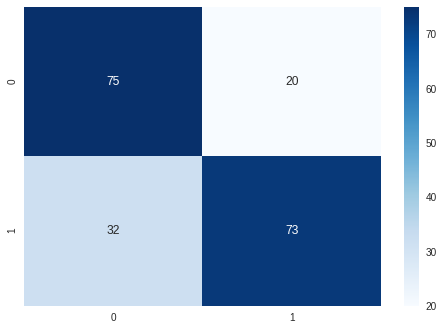

In [ ]:
# 3. Compare your prediction result with the first technique.
# Ridge Regression
sns.heatmap(confusion_matrix(y_test, pred, labels=[0,1]), annot=True, fmt=".0f", cmap="Blues")

In [ ]:
# Classification report for ridge regression
print(classification_report(y_test,pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        95
           1       0.78      0.70      0.74       105

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



In [ ]:
#Comparing it with the first technique
gd= xgb.XGBRegressor(subsample=  0.8, n_estimators= 200, min_child_weight= 5, max_depth= 5, learning_rate= 0.01, gamma= 1, colsample_by_tree= 0.6)
grid_result = gd.fit(x_train_scaled, y_train)
pred = gd.predict(x_test_scaled)
pred1 = pred.tolist()
pred1 = [round(i) for i in pred1]
pred1 = pd.Series(pred1)


[05:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


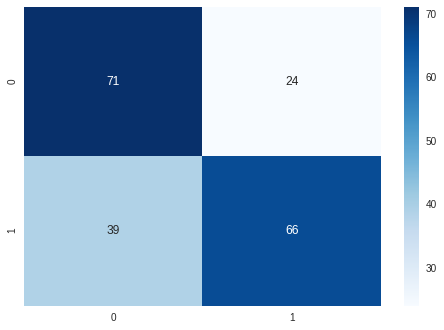

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, pred1, labels=[0,1]), annot=True, fmt=".0f", cmap="Blues")


In [ ]:
print(classification_report(y_test,pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.65      0.75      0.69        95
           1       0.73      0.63      0.68       105

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200



In [ ]:
"""
Comments and Observations:

Among Ridge Classifier and XgbRegressor, Ridge classifier seems to be the good fit for cardio_validation dataset.
From classification report and confusion matrix,we could infer that
1)Accuracy is great in Ridge
2) True positives and True Negative classification is higher in Ridge.
"""

'\nComments and Observations:\n\nAmong Ridge Classifier and XgbRegressor, Ridge classifier seems to be the good fit for cardio_validation dataset.\nFrom classification report and confusion matrix,we could infer that\n1)Accuracy is great in Ridge\n2) True positives and True Negative classification is higher in Ridge.\n'

In [68]:
# Task 3
poly = PolynomialFeatures(degree=3)
model = xgb.XGBRegressor(subsample=  0.8, n_estimators= 200, min_child_weight= 5, max_depth= 5, learning_rate= 0.01, gamma= 1, colsample_by_tree= 0.6)
X_ = poly.fit_transform(X)
X_valid_ = poly.fit_transform(X_valid)
model.fit(X_, y)
y_pred = model.predict(X_valid_)
print("Accuracy", accuracy_score(pd.Series([round(i) for i in y_pred.tolist()]),y_valid))


"""
Comments and Observations:
Adding polynomial feature decreases the accuracy.

"""

[05:59:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy 0.69


'\nComments and Observations:\nAdding polynomial feature decreases the accuracy.\n\n'

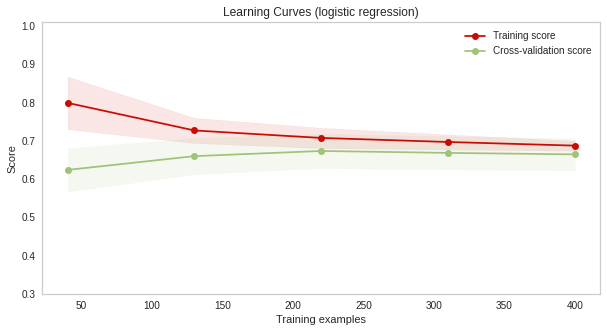

'\nComments and Observations:\n1) Apart from XgbRegressor, ridge classifier seemed to work well for me on the dataset. From the plot, I infer that in Ridgeregression\ntraining ssore is still the maximum and CV score could be increase. Hence there is a slight overfit in the model.\n'

In [14]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")
    return plt


# X = X_transform.iloc[: , :-1]
# y = data_train.iloc[: ,-1]

title = "Learning Curves (logistic regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


estimator = RidgeClassifier(alpha=0.1)
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(0.3, 1.01),
                    cv=cv, n_jobs=4)



plt.show()

"""
Comments and Observations:
1) Apart from XgbRegressor, ridge classifier seemed to work well for me on the dataset. From the plot, I infer that in Ridgeregression
training ssore is still the maximum and CV score could be increase. Hence there is a slight overfit in the model.
"""